In [89]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.disable_eager_execution()
sess = tf.InteractiveSession()

/Users/manish/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [90]:
X =np.expand_dims(np.arange(1,1250,5),1)
Y =X*(1+X**2)
x = tf.placeholder(tf.float64, [250,1],name='x')
y = tf.placeholder(tf.float64, [250,1],name='y')
input_layer = tf.layers.dense(x, 250, activation= tf.nn.relu)
hidden_layer1 = tf.layers.dropout(input_layer,20)
hidden_layer = tf.layers.dropout(hidden_layer1,20)
output_layer = tf.layers.dense(hidden_layer,1)
Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.01).minimize(Loss)
init = tf.global_variables_initializer()
loss_list=[]
sess.run(init)

for i in range(0,2000):
  fd ={x:X, y:Y}
  _, loss_val = sess.run([Optimizer, Loss], feed_dict=fd)
  #print ('loss = %s' % loss_val)
  loss_list.append(loss_val)
YP = sess.run(output_layer,feed_dict={x:X})

/Users/manish/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/manish/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Users/manish/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:268: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  warnings.warn('`tf.layers.dropout` is deprecated and '


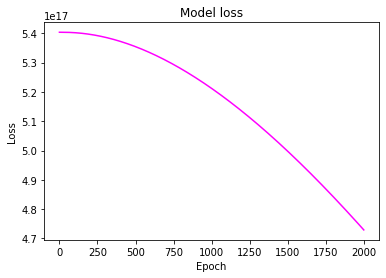

In [91]:

# Plot training  loss values
plt.plot(loss_list,color='magenta')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


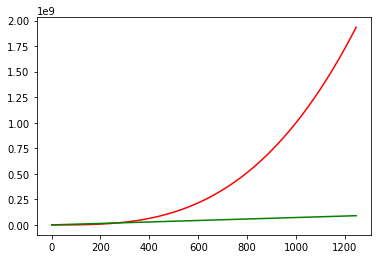

In [92]:
plt.plot(X,Y,color='red')
plt.plot(X,YP,color='green')
plt.show()
